<a href="https://colab.research.google.com/github/jpdicarvalho/Modelos-Estatisticos-Preditivos/blob/main/Regress%C3%A3o_Polinomial_(graus_2%2C_3%2C_4)_Previs%C3%A3o_para_o_ano_de_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

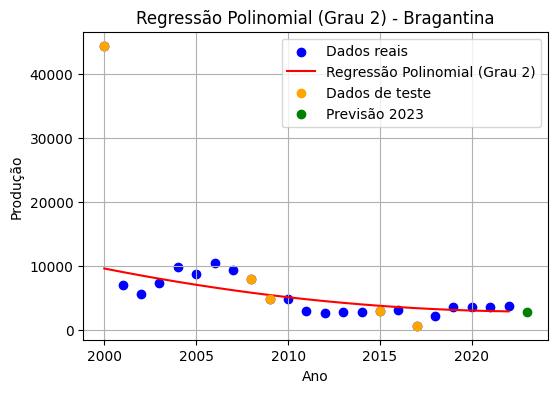

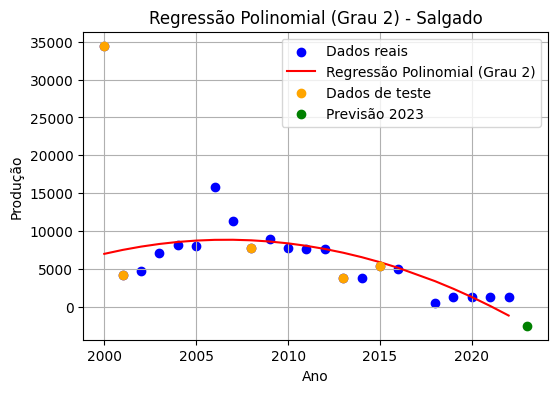

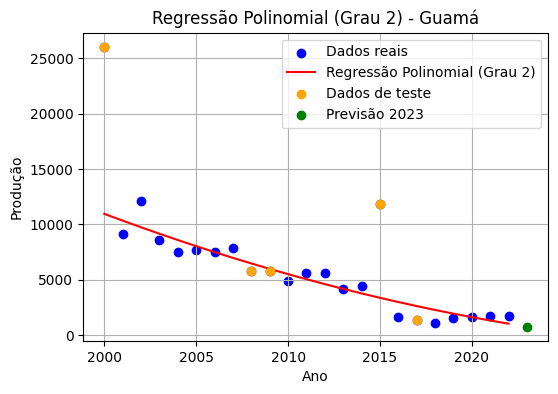

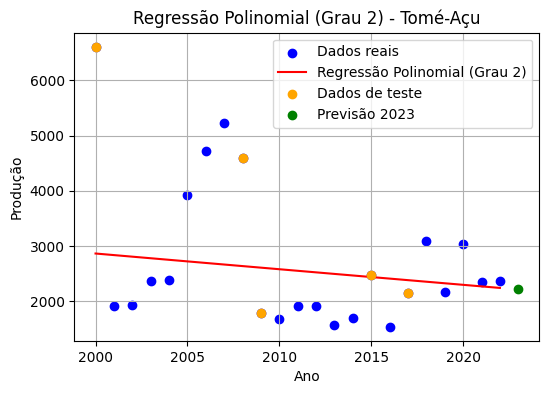

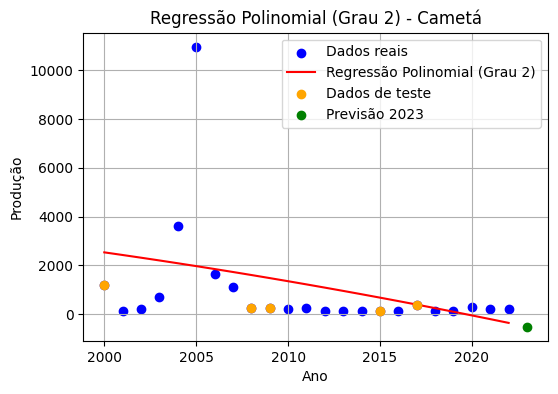

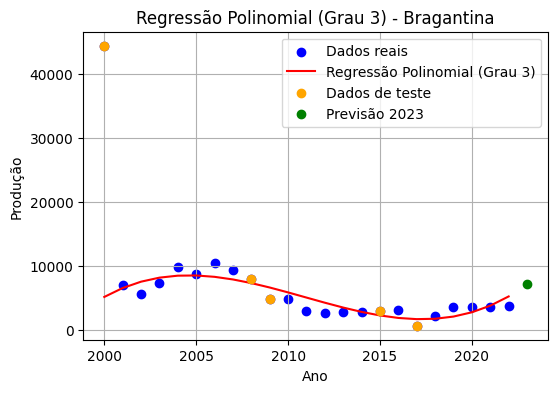

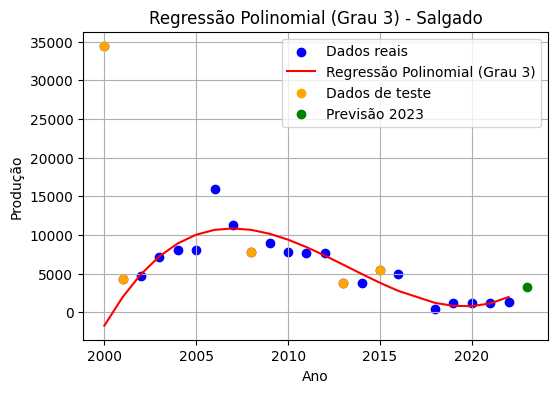

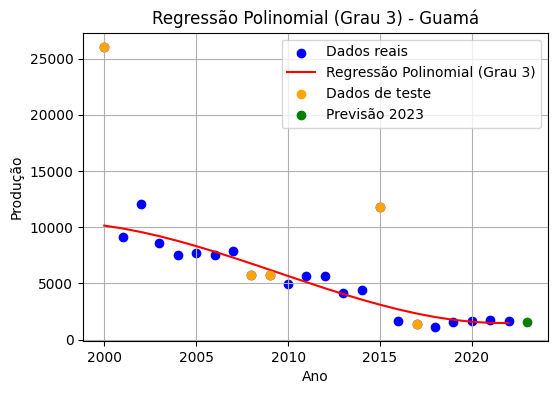

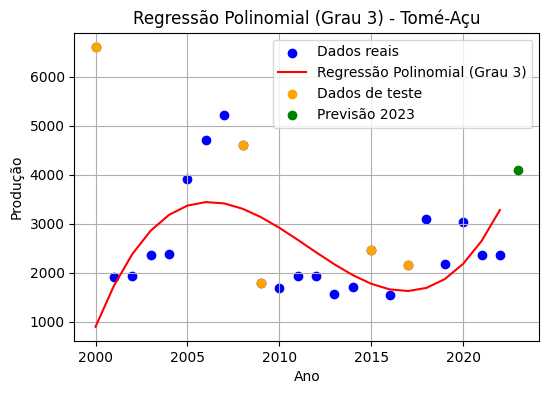

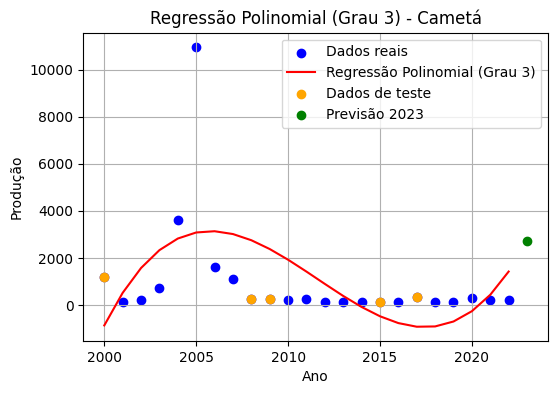

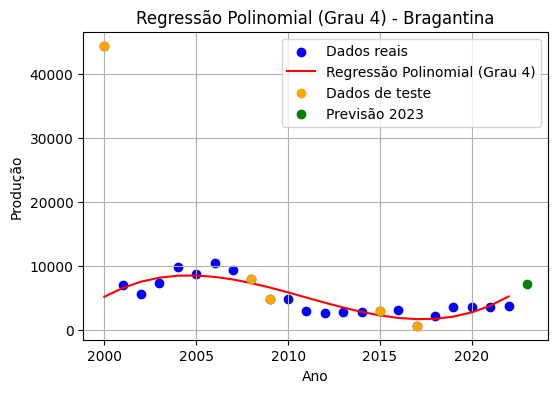

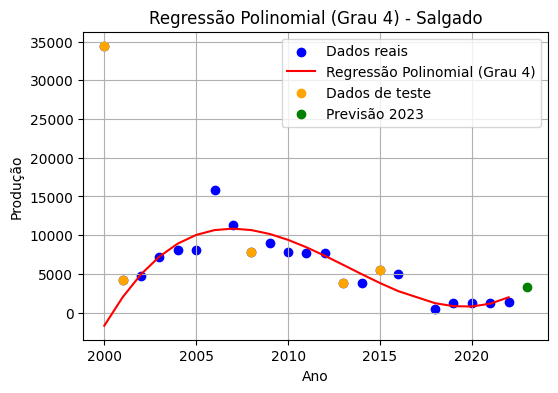

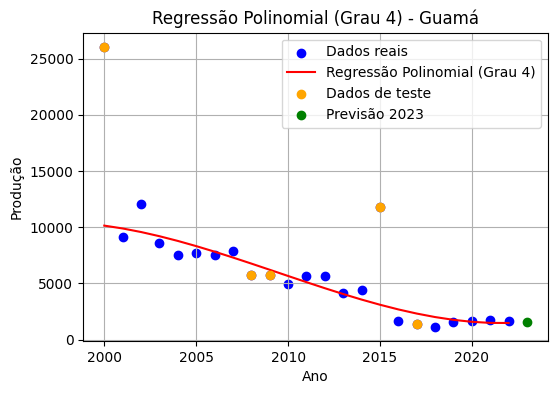

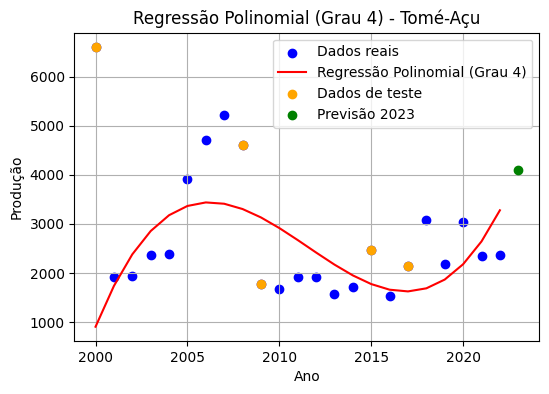

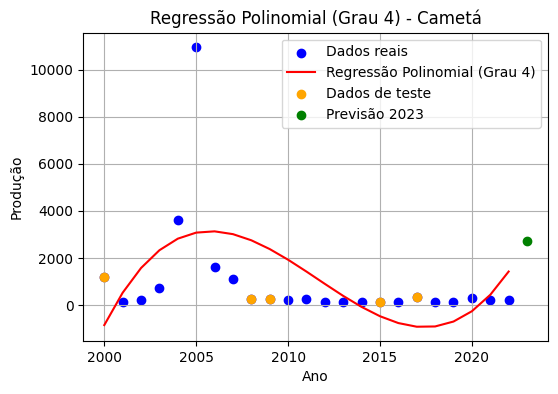

,Região,Grau do Polinômio,Intercepto,Coeficientes,R² Treino,R² Teste,MAE,MSE,RMSE,Produção Estimada em 2023
0,Bragantina,2,4.925621e+07,"[0.0, -48677.34813528917, 12.027029719843995]",0.555907,0.077687,8217.768612,2.448800e+08,15648.640617,2907.081558
1,Salgado,2,-1.707120e+08,"[0.0, 170156.39551273888, -42.398452698398614]",0.667910,-0.129572,7089.386361,1.555576e+08,12472.273988,-2505.937275
2,Guamá,2,3.243149e+07,"[0.0, -31798.119649753073, 7.793928995186434]",0.913708,0.187544,5139.092147,6.020108e+07,7758.935276,769.903337
3,Tomé-Açu,2,1.010418e+05,"[0.0, -69.64325146777216, 0.010277627824208935]",0.033848,-0.113343,1359.686316,3.719837e+06,1928.687822,2214.986528
4,Cametá,2,-4.181234e+06,"[0.0, 4291.096344626828, -1.0996062837075442]",0.125922,-6.255881,904.618554,1.096194e+06,1046.992879,-516.285093


,Região,Grau do Polinômio,Intercepto,Coeficientes,R² Treino,R² Teste,MAE,MSE,RMSE,Produção Estimada em 2023
0,Bragantina,3,-5.470040e+10,"[0.0, 81605699.0675088, -40581.19665172836, 6....",0.787521,-0.163951,8660.467883,3.090362e+08,17579.426808,7153.815453
1,Salgado,3,-8.144226e+10,"[0.0, 121359133.91598216, -60279.488642066244,...",0.842759,-0.935187,9058.675375,2.665018e+08,16324.882289,3309.740387
2,Guamá,3,-1.012925e+10,"[0.0, 15123471.403359838, -7526.416394553729, ...",0.919668,0.105738,5395.748887,6.626271e+07,8140.190760,1558.008188
3,Tomé-Açu,3,-2.426137e+10,"[0.0, 36183810.23828612, -17988.25188503841, 2...",0.345519,-1.208004,1916.420399,7.377253e+06,2716.109914,4096.478455
4,Cametá,3,-4.188227e+10,"[0.0, 62461828.775602214, -31050.908678381667,...",0.282909,-21.617041,1715.442270,3.416907e+06,1848.487645,2730.102791


,Região,Grau do Polinômio,Intercepto,Coeficientes,R² Treino,R² Teste,MAE,MSE,RMSE,Produção Estimada em 2023
0,Bragantina,4,-1.364779e+10,"[0.0, 15.087486425853543, 20250.420855225966, ...",0.786907,-0.162826,8656.428721,3.087376e+08,17570.930734,7160.387323
1,Salgado,4,-2.038619e+10,"[0.0, 22.412302905570726, 30178.204583516206, ...",0.842564,-0.930965,9046.780571,2.659204e+08,16307.066129,3318.855076
2,Guamá,4,-2.531211e+09,"[0.0, 2.802808915549381, 3761.929489441679, -2...",0.919698,0.105719,5395.945155,6.626413e+07,8140.278376,1562.427982
3,Tomé-Açu,4,-6.056461e+09,"[0.0, 6.691273288701615, 8981.025489460453, -5...",0.344458,-1.202025,1914.595237,7.357274e+06,2712.429594,4099.073960
4,Cametá,4,-1.045330e+10,"[0.0, 11.548223543951533, 15500.023019851218, ...",0.282285,-21.511340,1711.198415,3.400938e+06,1844.163103,2734.939404


       Região  Grau do Polinômio    Intercepto  \
0  Bragantina                  2  4.925621e+07   
1     Salgado                  2 -1.707120e+08   
2       Guamá                  2  3.243149e+07   
3    Tomé-Açu                  2  1.010418e+05   
4      Cametá                  2 -4.181234e+06   

                                      Coeficientes  R² Treino  R² Teste  \
0    [0.0, -48677.34813528917, 12.027029719843995]   0.555907  0.077687   
1   [0.0, 170156.39551273888, -42.398452698398614]   0.667910 -0.129572   
2    [0.0, -31798.119649753073, 7.793928995186434]   0.913708  0.187544   
3  [0.0, -69.64325146777216, 0.010277627824208935]   0.033848 -0.113343   
4    [0.0, 4291.096344626828, -1.0996062837075442]   0.125922 -6.255881   

           MAE           MSE          RMSE  Produção Estimada em 2023  
0  8217.768612  2.448800e+08  15648.640617                2907.081558  
1  7089.386361  1.555576e+08  12472.273988               -2505.937275  
2  5139.092147  6.020108e+07   7

,Região,Grau do Polinômio,Intercepto,Coeficientes,R² Treino,R² Teste,MAE,MSE,RMSE,Produção Estimada em 2023
0,Bragantina,2,4.925621e+07,"[0.0, -48677.34813528917, 12.027029719843995]",0.555907,0.077687,8217.768612,2.448800e+08,15648.640617,2907.081558
1,Salgado,2,-1.707120e+08,"[0.0, 170156.39551273888, -42.398452698398614]",0.667910,-0.129572,7089.386361,1.555576e+08,12472.273988,-2505.937275
2,Guamá,2,3.243149e+07,"[0.0, -31798.119649753073, 7.793928995186434]",0.913708,0.187544,5139.092147,6.020108e+07,7758.935276,769.903337
3,Tomé-Açu,2,1.010418e+05,"[0.0, -69.64325146777216, 0.010277627824208935]",0.033848,-0.113343,1359.686316,3.719837e+06,1928.687822,2214.986528
4,Cametá,2,-4.181234e+06,"[0.0, 4291.096344626828, -1.0996062837075442]",0.125922,-6.255881,904.618554,1.096194e+06,1046.992879,-516.285093


In [8]:
# Recarregar as bibliotecas necessárias após a reinicialização do estado de execução
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

# Recarregar os dados fornecidos para análise (Ajustado para previsão de 2023)
data = {
    "Year": list(range(2000, 2023)),  # Agora o intervalo é de 2000 a 2022
    "Bragantina": [44440, 7031, 5646, 7394, 9906, 8728, 10512, 9448, 8003, 4943, 4879, 3071, 2717, 2868, 2868, 2955, 3177, 695, 2163, 3600, 3581, 3669, 3803],
    "Salgado": [34464, 4254, 4724, 7114, 8102, 8071, 15875, 11323, 7807, 8931, 7766, 7672, 7672, 3828, 3828, 5433, 4926, None, 430, 1250, 1250, 1250, 1300],
    "Guamá": [26052, 9103, 12086, 8562, 7551, 7692, 7554, 7893, 5761, 5771, 4916, 5629, 5652, 4152, 4440, 11820, 1682, 1410, 1144, 1572, 1687, 1779, 1697],
    "Tomé-Açu": [6608, 1914, 1932, 2363, 2379, 3920, 4712, 5220, 4601, 1781, 1684, 1924, 1924, 1569, 1706, 2471, 1541, 2150, 3088, 2176, 3031, 2353, 2360],
    "Cametá": [1195, 132, 216, 705, 3600, 10969, 1634, 1114, 244, 244, 204, 254, 120, 120, 120, 120, 120, 360, 120, 120, 300, 200, 220]
}

# Criar DataFrame
df = pd.DataFrame(data)

# Definir as regiões
regions = ["Bragantina", "Salgado", "Guamá", "Tomé-Açu", "Cametá"]  # Lista das regiões

# Função para treinar e avaliar modelo de Regressão Polinomial com diferentes graus
def train_and_evaluate_polynomial_model(data, regions, degree):
    results = []

    for region in regions:
        region_data = np.array(data[region], dtype=float)  # Garantir tipo float

        # Remover valores nulos para treinamento
        valid_indices = ~np.isnan(region_data)
        years_valid = np.array(data["Year"])[valid_indices].reshape(-1, 1)
        values_valid = region_data[valid_indices]

        # Criar termos polinomiais
        poly = PolynomialFeatures(degree=degree)
        years_poly = poly.fit_transform(years_valid)

        # Dividir os dados em treino (80%) e teste (20%)
        X_train, X_test, y_train, y_test = train_test_split(years_poly, values_valid, test_size=0.2, random_state=42)

        # Regressão Polinomial
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Previsão para os dados de teste
        y_pred = model.predict(X_test)

        # Métricas de erro
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        # Previsão para 2023
        future_year_poly = poly.transform([[2023]])
        future_prediction = model.predict(future_year_poly)

        # Coeficientes do modelo
        intercept = model.intercept_
        coefficients = model.coef_

        # Armazenar os resultados
        results.append({
            "Região": region,
            "Grau do Polinômio": degree,
            "Intercepto": intercept,
            "Coeficientes": coefficients.tolist(),
            "R² Treino": model.score(X_train, y_train),
            "R² Teste": r2,
            "MAE": mae,
            "MSE": mse,
            "RMSE": rmse,
            "Produção Estimada em 2023": future_prediction[0]
        })

        # Gráfico para a região
        plt.figure(figsize=(6, 4))
        plt.scatter(years_valid, values_valid, color="blue", label="Dados reais")
        plt.plot(years_valid, model.predict(years_poly), color="red", label=f"Regressão Polinomial (Grau {degree})")
        plt.scatter(X_test[:, 1], y_test, color="orange", label="Dados de teste", zorder=5)
        plt.scatter(2023, future_prediction, color="green", label="Previsão 2023", zorder=6)
        plt.title(f"Regressão Polinomial (Grau {degree}) - {region}")
        plt.xlabel("Ano")
        plt.ylabel("Produção")
        plt.legend()
        plt.grid()
        plt.show()

    return pd.DataFrame(results)

# Testar diferentes graus de regressão polinomial
degrees = [2, 3, 4]  # Grau 2, 3 e 4
polynomial_results = {}

# Se estiver rodando no Jupyter Notebook ou Colab, use display() para melhor visualização
from IPython.display import display

for d in degrees:
    polynomial_results[d] = train_and_evaluate_polynomial_model(data, regions, degree=d)

# Exibir tabelas para diferentes graus de polinômios no ambiente correto
for d, df in polynomial_results.items():
    display(df)  # Substitui ace_tools para visualização no Colab/Jupyter

# Exibir tabela final com previsões da regressão polinomial quadrática
print(polynomial_results[2])  # Exibir previsões de grau 2
display(polynomial_results[2])  # Melhor visualização no Jupyter Notebook ou Colab


In [6]:
CET

NameError: name 'regions' is not defined